In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')

In [62]:
df.describe()
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
uncontacted = df[df['pdays'] == 999].shape[0]
uncontacted

35696

<Axes: title={'center': 'Number of Deposits by Month'}, xlabel='Month', ylabel='Count'>

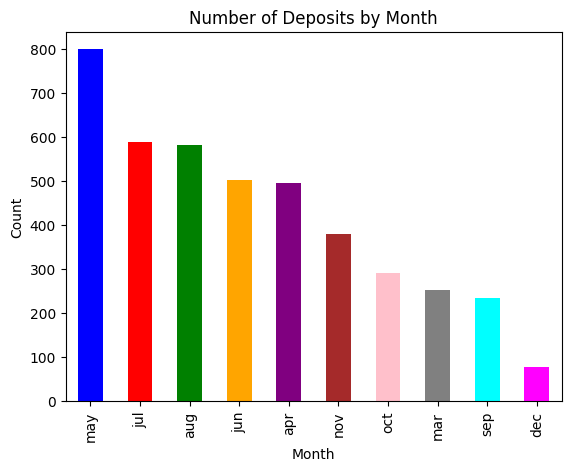

In [19]:
have_deposit = df[df['y'] == 'yes']
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta']

# Plot the bar chart with different colors for each bar
have_deposit.month.value_counts().plot(kind='bar', color=colors, xlabel='Month', ylabel='Count', title='Number of Deposits by Month')


<Axes: title={'center': 'Number of Deposits by Age (Count > 100)'}, xlabel='Age', ylabel='Count'>

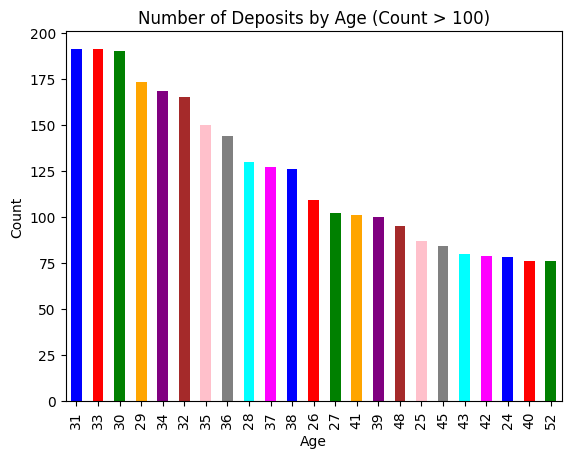

In [21]:
age_counts = have_deposit.age.value_counts()

# Filter the ages where the count is greater than 100
filtered_age_counts = age_counts[age_counts > 75]

filtered_age_counts.plot(kind='bar', color=colors, xlabel='Age', ylabel='Count', title='Number of Deposits by Age (Count > 100)')


In [65]:
# Filter the DataFrame to include only people who have a deposit
deposit_df = df[df['y'] == 'yes']

# Count the number of people who have a deposit and are married
deposit_and_married = deposit_df[deposit_df['marital'] == 'married'].shape[0]

# Count the total number of people who have a deposit
total_with_deposit = deposit_df.shape[0]

# Calculate the percentage
percentage = (deposit_and_married / total_with_deposit) * 100

# Print the result
print(f"Percentage of people who have a deposit and are married: {percentage:.2f}%")

Percentage of people who have a deposit and are married: 54.54%


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming df is your DataFrame and 'y' is the target variable
# Preprocess the data
# Convert categorical variables to dummy/indicator variables
df = pd.get_dummies(df, drop_first=True)
# Define features and target
X = df.drop('y_yes', axis=1)  # Assuming 'y' column is binary and converted to 'y_yes' after get_dummies
y = df['y_yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

       False       0.91      0.97      0.94      6528
        True       0.58      0.28      0.38       886

    accuracy                           0.89      7414
   macro avg       0.74      0.63      0.66      7414
weighted avg       0.87      0.89      0.87      7414



Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

       False       0.91      0.97      0.94      6528
        True       0.58      0.28      0.38       886

    accuracy                           0.89      7414
   macro avg       0.74      0.63      0.66      7414
weighted avg       0.87      0.89      0.87      7414



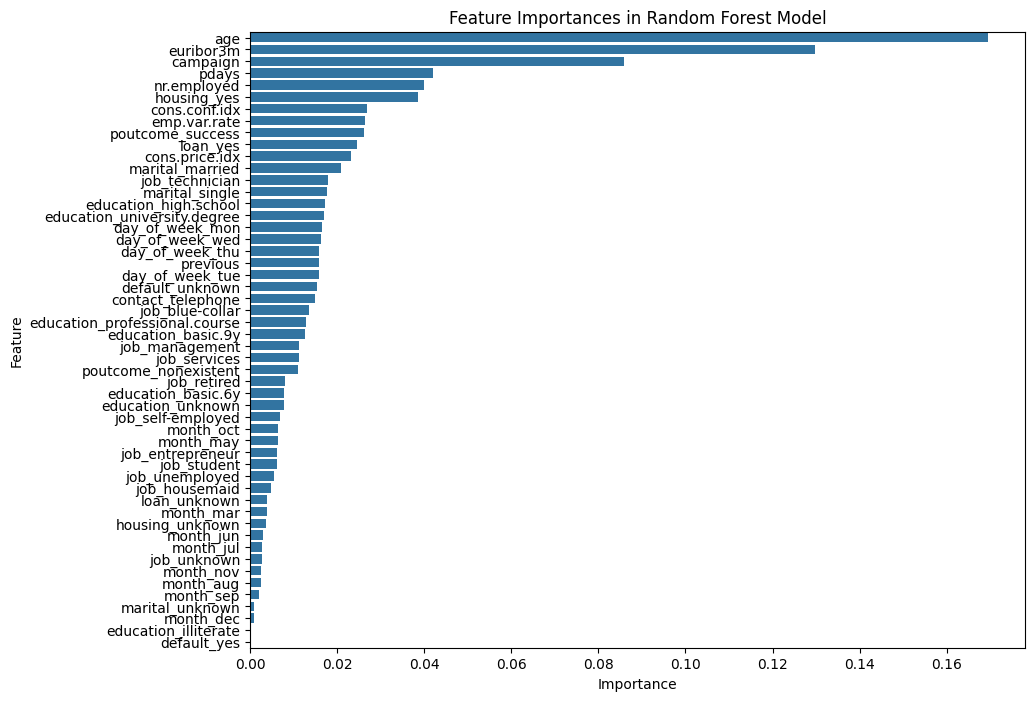

In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and 'y' is the target variable
# Preprocess the data
# Convert categorical variables to dummy/indicator variables
df = pd.get_dummies(df, drop_first=True)

# Define features and target
X = df.drop('y_yes', axis=1)  # Assuming 'y' column is binary and converted to 'y_yes' after get_dummies
y = df['y_yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

# Get feature importances
feature_importances = rf.feature_importances_
features = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances in Random Forest Model')
plt.show()

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the training data
# Assuming df is your DataFrame and 'y' is the target variable
# Preprocess the data
# Convert categorical variables to dummy/indicator variables
df = pd.get_dummies(df, drop_first=True)
# Define features and target
X = df.drop('y_yes', axis=1)  # Assuming 'y' column is binary and converted to 'y_yes' after get_dummies
y = df['y_yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

# Load the mini holdout test set
test = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank_holdout_test_mini.csv")

# Preprocess the mini holdout test set
test_onehot = pd.get_dummies(test, drop_first=True)

# Ensure the test set has the same columns as the training set
missing_cols = set(X_train.columns) - set(test_onehot.columns)
for col in missing_cols:
    test_onehot[col] = 0
test_onehot = test_onehot[X_train.columns]

# Make predictions on the mini holdout test set
predictions = rf.predict(test_onehot)

# Convert the predictions to 0 and 1
predictions = [1 if pred else 0 for pred in predictions]

# Convert the predictions to a dataframe and label the column 'y'
my_predictions = pd.DataFrame(predictions, columns=['predictions'])

# Replace PUTTEAMNUMBERHERE with your team
my_predictions.to_csv("team2_rf-module2-predictions.csv", index=False)

Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

       False       0.91      0.97      0.94      6528
        True       0.58      0.28      0.38       886

    accuracy                           0.89      7414
   macro avg       0.74      0.63      0.66      7414
weighted avg       0.87      0.89      0.87      7414



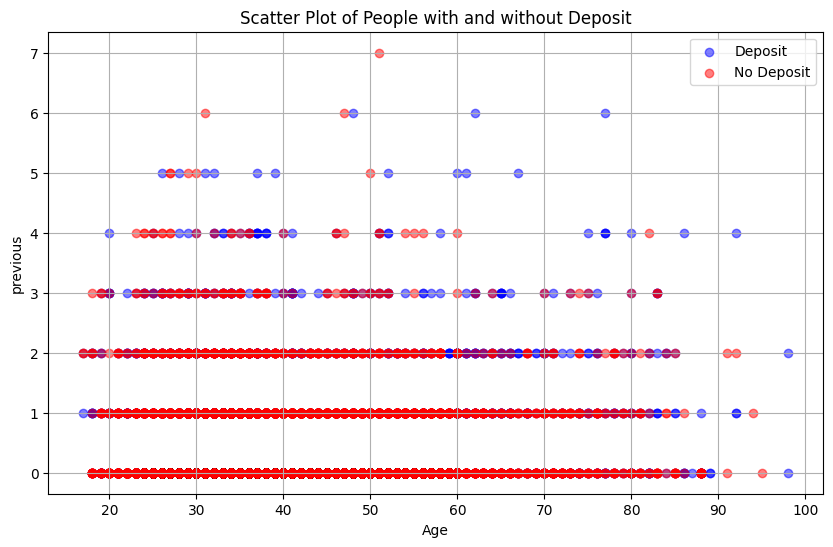

In [76]:
deposit = df[df['y_yes'] == 1]
no_deposit = df[df['y_yes'] == 0]

# Create the scatter plot
plt.figure(figsize=(10, 6))

plt.scatter(deposit['age'], deposit['previous'], color='blue', label='Deposit', alpha=0.5)
plt.scatter(no_deposit['age'], no_deposit['previous'], color='red', label='No Deposit', alpha=0.5)

# Customize the plot
plt.xlabel('Age')
plt.ylabel('previous')
plt.title('Scatter Plot of People with and without Deposit')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

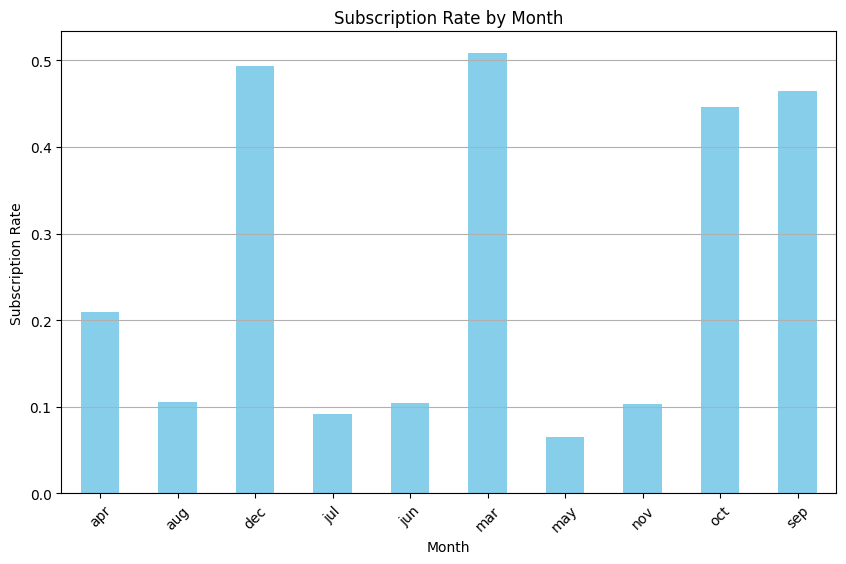

In [50]:
# Convert 'y' column to numeric values if necessary
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Group by month and calculate the success rate
month_success_rate = df.groupby('month')['y'].mean().sort_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
month_success_rate.plot(kind='bar', color='skyblue')
plt.title('Subscription Rate by Month')
plt.xlabel('Month')
plt.ylabel('Subscription Rate')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.show()